In [1]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\st_hm\opencv\scripts\python.exe -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
df_abc = pd.read_csv('https://raw.githubusercontent.com/maratonadev/desafio-3-2021/main/assets/data/InsuranceCompanyABC.csv')
df_abc

,ID,Idade,Renda,Regiao,Genero,seguro auto,seguro vida Emp,seguro vida PF,Seguro Residencial
0,71504.0,42.993,4428.512,NE,1.0,T,T,T,T
1,59751.0,26.373,4489.930,CO,0.0,T,T,T,T
2,11877.0,46.977,4567.741,CO,0.0,F,F,F,F
3,33701.0,24.311,4592.132,NE,0.0,F,F,F,F
4,62029.0,28.896,4723.197,SE,1.0,F,F,F,F
...,...,...,...,...,...,...,...,...,...
10077,93046.0,40.087,10317.038,SE,0.0,F,F,F,T
10078,55486.0,31.589,10356.298,SE,1.0,F,F,F,F
10079,95085.0,18.783,10527.464,SE,0.0,F,F,F,F
10080,45040.0,19.480,10571.948,CO,1.0,F,F,F,F


In [3]:
df_cde = pd.read_csv('https://raw.githubusercontent.com/maratonadev/desafio-3-2021/main/assets/data/InvestmentBankCDE.csv')
df_cde

,ID,Investimento Fundos_cambiais,Investimento Fundos_commodities,Investimento LCI,Investimento LCA,Investimento Poupanca,Investimento Fundos Multimercado,Investimento Tesouro Direto
0,71504.0,F,F,F,F,F,F,F
1,59751.0,F,F,F,F,F,F,F
2,11877.0,F,F,F,F,F,F,F
3,33701.0,T,T,T,T,T,T,T
4,62029.0,F,F,T,F,T,T,F
...,...,...,...,...,...,...,...,...
10077,93046.0,F,T,F,F,T,F,F
10078,55486.0,F,T,F,F,F,F,F
10079,95085.0,F,F,T,T,T,F,F
10080,45040.0,T,T,T,T,T,T,T


In [4]:
df_efg = pd.read_csv('https://raw.githubusercontent.com/maratonadev/desafio-3-2021/main/assets/data/RetailBankEFG.csv')
df_efg

,ID,Financiamento Casa,Financiamento Carro,Emprestimo _pessoal,Emprestimo _consignado,Emprestimo _limite_especial,Emprestimo _educacao,Emprestimo _viagem,Investimento CDB,Investimento Fundos
0,71504.0,T,T,T,T,T,F,F,T,F
1,59751.0,T,T,T,T,T,F,F,F,T
2,11877.0,F,F,F,F,F,F,F,F,F
3,33701.0,F,F,F,F,F,F,F,F,F
4,62029.0,F,T,T,T,T,T,T,T,T
...,...,...,...,...,...,...,...,...,...,...
10077,93046.0,F,F,F,F,F,F,F,F,F
10078,55486.0,F,F,F,F,F,F,F,T,F
10079,95085.0,F,F,T,T,T,T,T,T,T
10080,45040.0,T,F,F,F,F,F,T,T,F


In [5]:
df_abc_cde = pd.merge(df_abc,df_cde,how='left', on='ID')
df_raw = pd.merge(df_abc_cde, df_efg, how='left', on='ID')
df_raw

,ID,Idade,Renda,Regiao,Genero,seguro auto,seguro vida Emp,seguro vida PF,Seguro Residencial,Investimento Fundos_cambiais,...,Investimento Tesouro Direto,Financiamento Casa,Financiamento Carro,Emprestimo _pessoal,Emprestimo _consignado,Emprestimo _limite_especial,Emprestimo _educacao,Emprestimo _viagem,Investimento CDB,Investimento Fundos
0,71504.0,42.993,4428.512,NE,1.0,T,T,T,T,F,...,F,T,T,T,T,T,F,F,T,F
1,59751.0,26.373,4489.930,CO,0.0,T,T,T,T,F,...,F,T,T,T,T,T,F,F,F,T
2,11877.0,46.977,4567.741,CO,0.0,F,F,F,F,F,...,F,F,F,F,F,F,F,F,F,F
3,33701.0,24.311,4592.132,NE,0.0,F,F,F,F,T,...,T,F,F,F,F,F,F,F,F,F
4,62029.0,28.896,4723.197,SE,1.0,F,F,F,F,F,...,F,F,T,T,T,T,T,T,T,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13725,93046.0,40.087,10317.038,SE,0.0,F,F,F,T,F,...,F,F,F,F,F,F,F,F,F,F
13726,55486.0,31.589,10356.298,SE,1.0,F,F,F,F,F,...,F,F,F,F,F,F,F,F,T,F
13727,95085.0,18.783,10527.464,SE,0.0,F,F,F,F,F,...,F,F,F,T,T,T,T,T,T,T
13728,45040.0,19.480,10571.948,CO,1.0,F,F,F,F,T,...,T,T,F,F,F,F,F,T,T,F


In [6]:
df_raw.describe()

,ID,Idade,Renda,Genero
count,13730.000000,13730.000000,13730.000000,13730.000000
mean,50974.464749,38.465648,7817.596786,0.540932
std,28812.177445,12.175172,6821.191768,0.498340
min,1004.000000,18.009000,2312.000000,0.000000
25%,26396.750000,28.918000,6988.937000,0.000000
50%,49686.000000,37.231500,7533.079000,1.000000
75%,75766.000000,46.669750,8049.112000,1.000000
max,100981.000000,85.605000,580000.000000,1.000000


In [7]:
df_raw.isna().sum()

ID                                  0
Idade                               0
Renda                               0
Regiao                              0
Genero                              0
seguro auto                         0
seguro vida Emp                     0
seguro vida PF                      0
Seguro Residencial                  0
Investimento Fundos_cambiais        0
Investimento Fundos_commodities     0
Investimento LCI                    0
Investimento LCA                    0
Investimento Poupanca               0
Investimento Fundos Multimercado    0
Investimento Tesouro Direto         0
Financiamento Casa                  0
Financiamento Carro                 0
Emprestimo _pessoal                 0
Emprestimo _consignado              0
Emprestimo _limite_especial         0
Emprestimo _educacao                0
Emprestimo _viagem                  0
Investimento CDB                    0
Investimento Fundos                 0
dtype: int64

In [8]:
le = LabelEncoder()
aux1 = ['seguro auto',
       'seguro vida Emp', 'seguro vida PF', 'Seguro Residencial',
       'Investimento Fundos_cambiais', 'Investimento Fundos_commodities',
       'Investimento LCI', 'Investimento LCA', 'Investimento Poupanca',
       'Investimento Fundos Multimercado', 'Investimento Tesouro Direto',
       'Financiamento Casa', 'Financiamento Carro', 'Emprestimo _pessoal',
       'Emprestimo _consignado', 'Emprestimo _limite_especial',
       'Emprestimo _educacao', 'Emprestimo _viagem', 'Investimento CDB',
       'Investimento Fundos']

for x in aux1:
    df_raw[x] = le.fit_transform(df_raw[x])
    df_raw[x] 

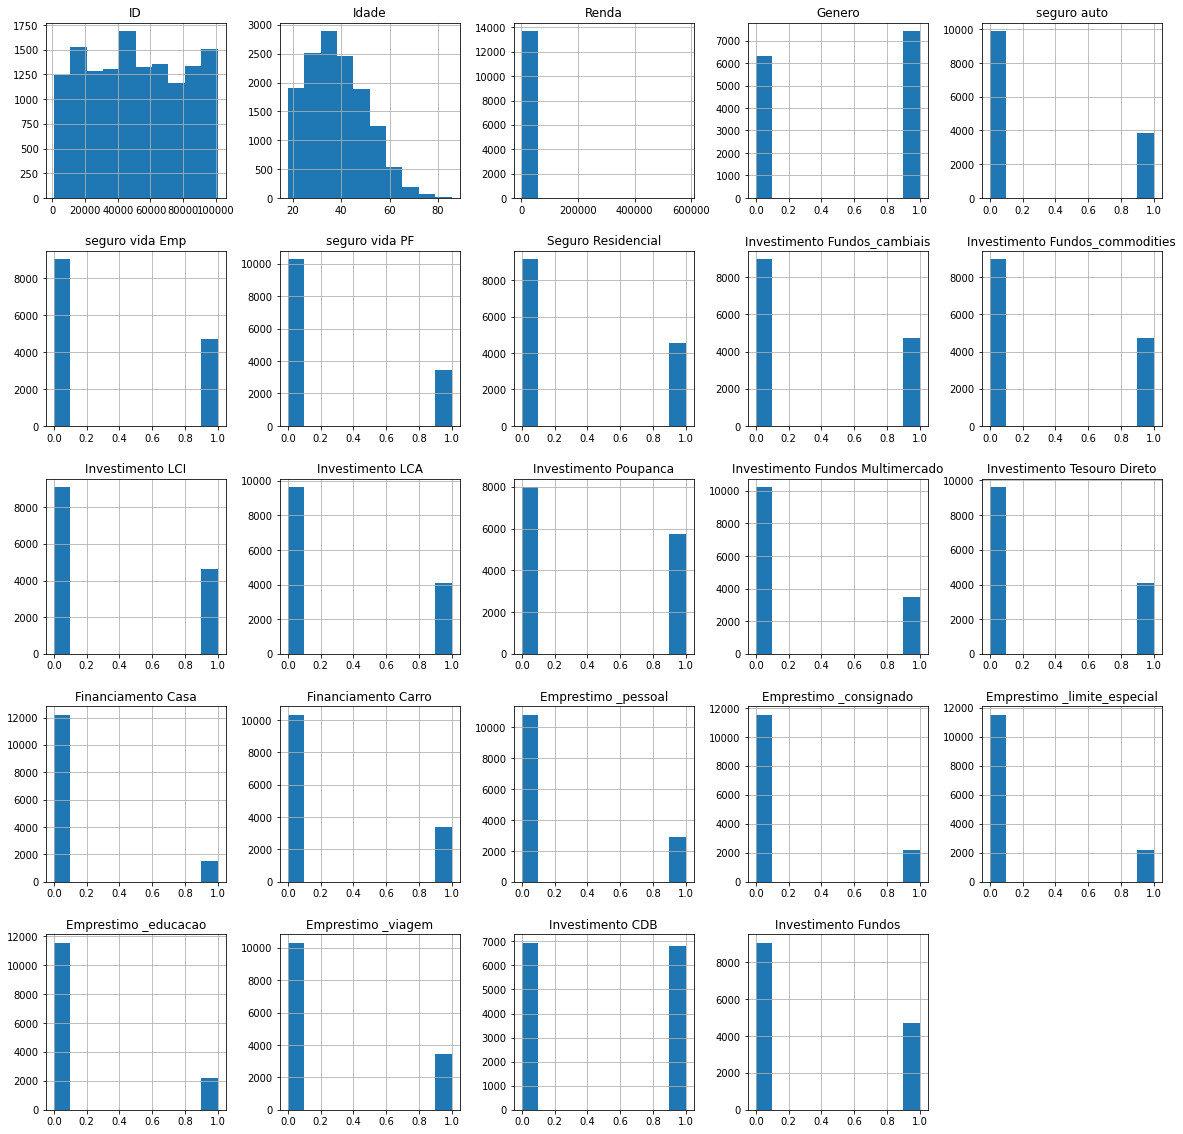

In [9]:
df_raw.hist(figsize=(20,20));

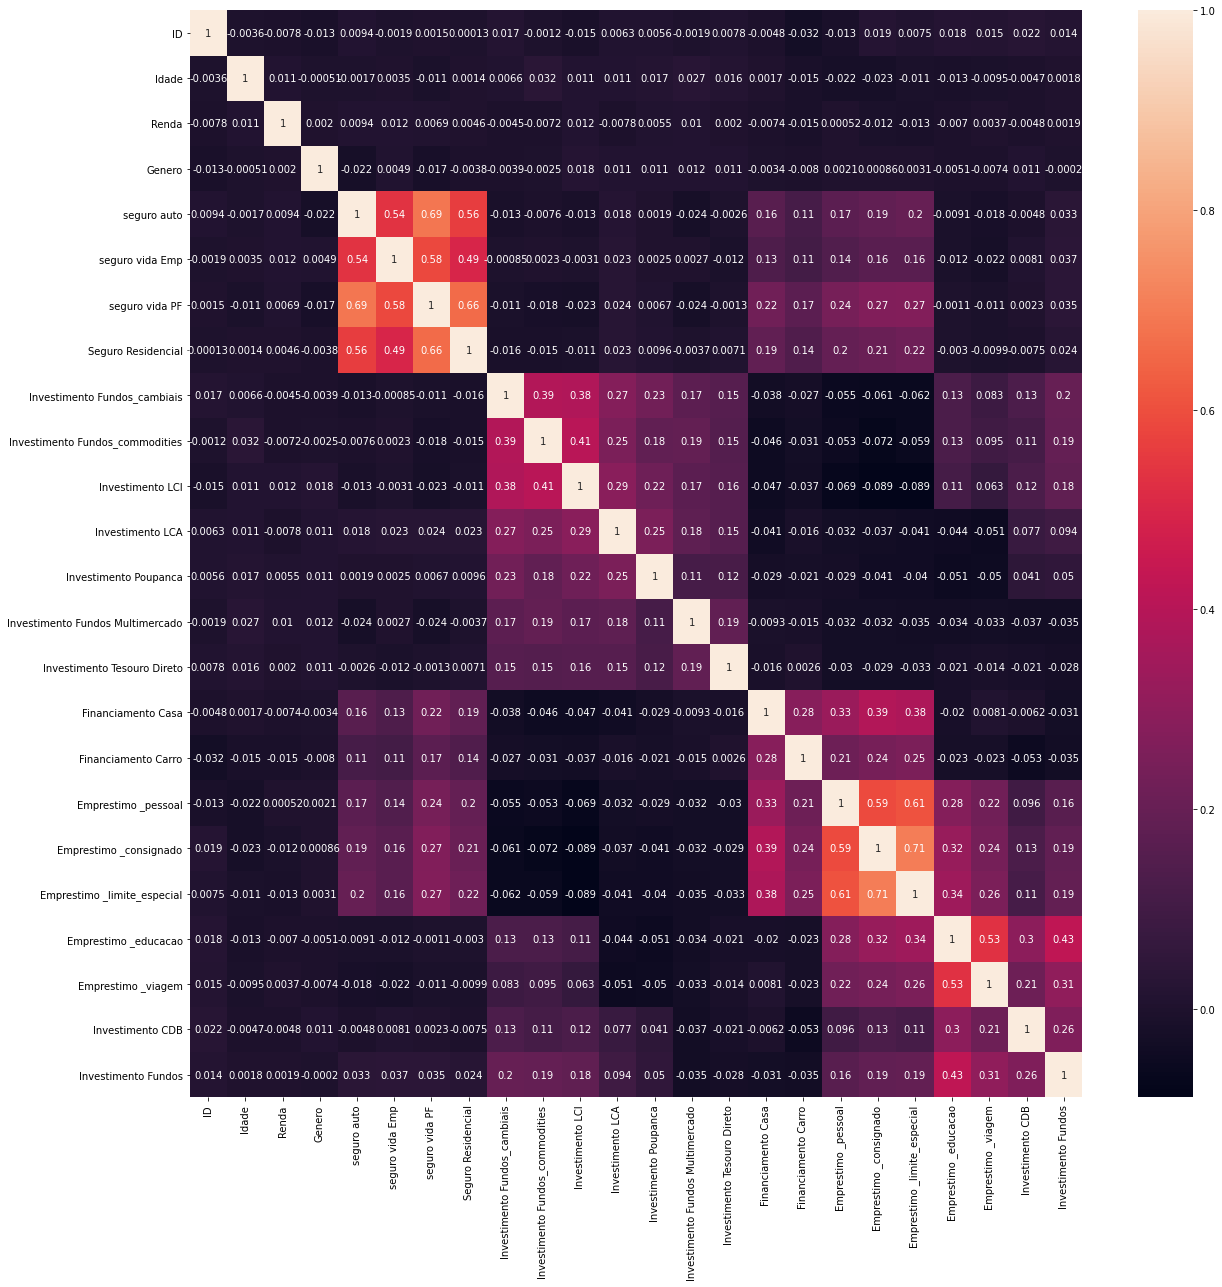

In [10]:
plt.figure(figsize=(20,20))
sns.heatmap(df_raw.corr(method='pearson'), annot=True);

In [11]:
df_raw.columns

Index(['ID', 'Idade', 'Renda', 'Regiao', 'Genero', 'seguro auto',
       'seguro vida Emp', 'seguro vida PF', 'Seguro Residencial',
       'Investimento Fundos_cambiais', 'Investimento Fundos_commodities',
       'Investimento LCI', 'Investimento LCA', 'Investimento Poupanca',
       'Investimento Fundos Multimercado', 'Investimento Tesouro Direto',
       'Financiamento Casa', 'Financiamento Carro', 'Emprestimo _pessoal',
       'Emprestimo _consignado', 'Emprestimo _limite_especial',
       'Emprestimo _educacao', 'Emprestimo _viagem', 'Investimento CDB',
       'Investimento Fundos'],
      dtype='object')

In [12]:
df_test = df_raw[['seguro auto',
       'seguro vida Emp', 'seguro vida PF', 'Seguro Residencial',
       'Investimento Fundos_cambiais', 'Investimento Fundos_commodities',
       'Investimento LCI', 'Investimento LCA', 'Investimento Poupanca',
       'Investimento Fundos Multimercado', 'Investimento Tesouro Direto',
       'Financiamento Casa', 'Financiamento Carro', 'Emprestimo _pessoal',
       'Emprestimo _consignado', 'Emprestimo _limite_especial',
       'Emprestimo _educacao', 'Emprestimo _viagem', 'Investimento CDB',
       'Investimento Fundos']]

In [16]:
# Building the model
frq_items = apriori(df_test, min_support = 0.1, use_colnames = True)
 
# Collecting the inferred rules in a dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules_filter = rules[(rules['support'] >= 0.1) & (rules['confidence'] > 0.8)]
rules_filter.sort_values('confidence', ascending = False)
rules_filter

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(seguro vida PF),(seguro auto),0.250182,0.278951,0.203642,0.813974,2.917979,0.133853,3.876060
11,(seguro vida PF),(seguro vida Emp),0.250182,0.342535,0.205827,0.822707,2.401823,0.120131,3.708364
29,(seguro vida PF),(Seguro Residencial),0.250182,0.332484,0.218135,0.871907,2.622405,0.134954,5.211179
128,(Emprestimo _educacao),(Investimento CDB),0.159942,0.494683,0.133503,0.834699,1.687342,0.054383,3.056958
130,(Emprestimo _educacao),(Investimento Fundos),0.159942,0.341005,0.128478,0.803279,2.355621,0.073937,3.349891
...,...,...,...,...,...,...,...,...,...
596,"(Investimento Fundos_cambiais, Investimento Fu...",(Investimento CDB),0.113474,0.494683,0.102039,0.899230,1.817789,0.045906,5.014545
601,"(Investimento Fundos, Investimento CDB, Invest...","(Investimento Fundos_cambiais, Investimento Fu...",0.125055,0.207429,0.102039,0.815958,3.933674,0.076099,4.306470
604,"(Investimento Fundos_cambiais, Investimento Fu...","(Investimento CDB, Investimento Fundos_commodi...",0.118718,0.196795,0.102039,0.859509,4.367528,0.078676,5.717134
605,"(Investimento Fundos_cambiais, Investimento Fu...","(Investimento CDB, Investimento LCI)",0.121340,0.195776,0.102039,0.840936,4.295408,0.078284,5.055991


Para as recomendações, deve-se considerar uma confiança de regra de 80% e um suporte mínimo de 10%, com um máximo de 5 antecedentes.

  "seguro auto",
  "seguro vida Emp",
  "seguro vida PF",
  "Seguro Residencial",
  "Investimento Fundos_cambiais",
  "Investimento Fundos_commodities",
  "Investimento LCI",
  "Investimento LCA",
  "Investimento Poupanca",
  "Investimento Fundos Multimercado",
  "Investimento Tesouro Direto",
  "Financiamento Casa",
  "Financiamento Carro",
  "Emprestimo _pessoal",
  "Emprestimo _consignado",
  "Emprestimo _limite_especial",
  "Emprestimo _educacao",
  "Emprestimo _viagem",
  "Investimento CDB",
  "Investimento Fundos"


In [17]:
df_ANSWERS = pd.read_csv('https://raw.githubusercontent.com/maratonadev/desafio-3-2021/main/assets/data/ANSWERS.csv')
df_ANSWERS

,ID,Idade,Renda,Regiao,Genero,seguro auto,seguro vida Emp,seguro vida PF,Seguro Residencial,Investimento Fundos_cambiais,...,Emprestimo _educacao,Emprestimo _viagem,Investimento CDB,Investimento Fundos,RECOMMENDATION_1,CONFIDENCE_1,RECOMMENDATION_2,CONFIDENCE_2,RECOMMENDATION_3,CONFIDENCE_3
0,1004.0,40.685,8474.687,CO,1.0,F,F,F,F,F,...,T,F,T,F,NaN,NaN,NaN,NaN,NaN,NaN
1,1028.0,56.693,7996.353,SE,0.0,F,F,F,F,T,...,F,F,F,F,NaN,NaN,NaN,NaN,NaN,NaN
2,1034.0,49.413,8624.335,NE,0.0,T,T,T,T,F,...,F,F,T,F,NaN,NaN,NaN,NaN,NaN,NaN
3,1035.0,22.764,6885.196,S,1.0,F,F,F,T,F,...,F,F,F,F,NaN,NaN,NaN,NaN,NaN,NaN
4,1039.0,22.059,7749.965,NE,1.0,T,T,T,T,F,...,F,F,F,F,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13725,100932.0,28.659,8804.506,S,1.0,F,F,F,F,F,...,F,F,F,F,NaN,NaN,NaN,NaN,NaN,NaN
13726,100962.0,20.505,6809.895,SE,0.0,F,F,F,F,F,...,F,T,T,F,NaN,NaN,NaN,NaN,NaN,NaN
13727,100963.0,21.067,6201.485,SE,1.0,F,F,F,F,F,...,F,F,T,F,NaN,NaN,NaN,NaN,NaN,NaN
13728,100978.0,43.481,8130.084,N,0.0,T,T,T,T,F,...,T,F,T,F,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df_ANSWERS_1 =  df_ANSWERS[['seguro auto',
       'seguro vida Emp', 'seguro vida PF', 'Seguro Residencial',
       'Investimento Fundos_cambiais', 'Investimento Fundos_commodities',
       'Investimento LCI', 'Investimento LCA', 'Investimento Poupanca',
       'Investimento Fundos Multimercado', 'Investimento Tesouro Direto',
       'Financiamento Casa', 'Financiamento Carro', 'Emprestimo _pessoal',
       'Emprestimo _consignado', 'Emprestimo _limite_especial',
       'Emprestimo _educacao', 'Emprestimo _viagem', 'Investimento CDB',
       'Investimento Fundos']]
df_ANSWERS_1

,seguro auto,seguro vida Emp,seguro vida PF,Seguro Residencial,Investimento Fundos_cambiais,Investimento Fundos_commodities,Investimento LCI,Investimento LCA,Investimento Poupanca,Investimento Fundos Multimercado,Investimento Tesouro Direto,Financiamento Casa,Financiamento Carro,Emprestimo _pessoal,Emprestimo _consignado,Emprestimo _limite_especial,Emprestimo _educacao,Emprestimo _viagem,Investimento CDB,Investimento Fundos
0,F,F,F,F,F,T,F,F,F,T,F,F,F,F,F,F,T,F,T,F
1,F,F,F,F,T,F,F,F,F,F,F,F,F,F,F,F,F,F,F,F
2,T,T,T,T,F,F,F,F,F,F,F,F,F,F,F,F,F,F,T,F
3,F,F,F,T,F,F,F,T,F,F,F,F,F,F,F,F,F,F,F,F
4,T,T,T,T,F,F,F,T,F,F,F,F,F,F,F,F,F,F,F,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13725,F,F,F,F,F,T,T,F,T,F,F,F,F,F,T,F,F,F,F,F
13726,F,F,F,F,F,F,F,F,F,T,F,F,F,F,T,F,F,T,T,F
13727,F,F,F,F,F,T,F,F,F,F,T,F,F,F,F,F,F,F,T,F
13728,T,T,T,T,F,F,T,F,F,T,T,F,F,F,F,F,T,F,T,F


In [19]:
le = LabelEncoder()
aux1 = ['seguro auto',
       'seguro vida Emp', 'seguro vida PF', 'Seguro Residencial',
       'Investimento Fundos_cambiais', 'Investimento Fundos_commodities',
       'Investimento LCI', 'Investimento LCA', 'Investimento Poupanca',
       'Investimento Fundos Multimercado', 'Investimento Tesouro Direto',
       'Financiamento Casa', 'Financiamento Carro', 'Emprestimo _pessoal',
       'Emprestimo _consignado', 'Emprestimo _limite_especial',
       'Emprestimo _educacao', 'Emprestimo _viagem', 'Investimento CDB',
       'Investimento Fundos']

for x in aux1:
    df_ANSWERS_1[x] = le.fit_transform(df_ANSWERS_1[x])
    df_ANSWERS_1[x] 

<ipython-input-19-dc4fa6e929d3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ANSWERS_1[x] = le.fit_transform(df_ANSWERS_1[x])


In [20]:
df_ANSWERS_1

,seguro auto,seguro vida Emp,seguro vida PF,Seguro Residencial,Investimento Fundos_cambiais,Investimento Fundos_commodities,Investimento LCI,Investimento LCA,Investimento Poupanca,Investimento Fundos Multimercado,Investimento Tesouro Direto,Financiamento Casa,Financiamento Carro,Emprestimo _pessoal,Emprestimo _consignado,Emprestimo _limite_especial,Emprestimo _educacao,Emprestimo _viagem,Investimento CDB,Investimento Fundos
0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13725,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0
13726,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0
13727,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
13728,1,1,1,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0


In [47]:
frq_items = apriori(df_ANSWERS_1, min_support = 0.01, use_colnames = True)

rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules['length'] = rules['antecedents'].apply(lambda x: len(x))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length
799356,"(Emprestimo _consignado, seguro vida PF, segur...","(Emprestimo _limite_especial, Emprestimo _pess...",0.018281,0.038820,0.018281,1.000000,25.759850,0.017571,inf,7
799273,"(Emprestimo _consignado, seguro auto, seguro v...","(Emprestimo _pessoal, Investimento CDB, seguro...",0.018281,0.042098,0.018281,1.000000,23.754325,0.017512,inf,7
783724,"(Emprestimo _consignado, seguro vida PF, segur...","(Emprestimo _limite_especial, Investimento CDB...",0.018427,0.042826,0.018427,1.000000,23.350340,0.017638,inf,7
787812,"(Emprestimo _consignado, seguro vida PF, segur...","(Emprestimo _limite_especial, Investimento CDB...",0.018281,0.042826,0.018281,1.000000,23.350340,0.017498,inf,7
799103,"(Emprestimo _consignado, seguro vida PF, segur...","(Emprestimo _limite_especial, Investimento CDB...",0.018281,0.042826,0.018281,1.000000,23.350340,0.017498,inf,8
...,...,...,...,...,...,...,...,...,...,...
73494,(Investimento CDB),"(Emprestimo _consignado, Investimento Tesouro ...",0.494683,0.017407,0.010051,0.020318,1.167224,0.001440,1.002971,1
242026,(Investimento CDB),"(seguro vida PF, Investimento Tesouro Direto, ...",0.494683,0.017626,0.010051,0.020318,1.152754,0.001332,1.002748,1
478450,(Investimento CDB),"(Investimento Poupanca, seguro vida Emp, Inves...",0.494683,0.017771,0.010051,0.020318,1.143305,0.001260,1.002600,1
223416,(Investimento CDB),"(Investimento Poupanca, seguro auto, Investime...",0.494683,0.019519,0.010051,0.020318,1.040920,0.000395,1.000815,1


In [48]:
rules_filter = rules[(rules['support']>= 0.1) & (rules['confidence']>0.8) & (rules['length'] <= 6) ]
rules_filter

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length
5026,"(seguro vida Emp, seguro vida PF, seguro auto)",(Seguro Residencial),0.197451,0.332484,0.197087,0.998156,3.002120,0.131438,361.927385,3
122170,"(Investimento Fundos_cambiais, Investimento Po...",(Investimento Fundos_commodities),0.122433,0.345521,0.121413,0.991672,2.870078,0.079110,78.584258,4
5025,"(seguro vida Emp, Seguro Residencial, seguro a...",(seguro vida PF),0.198980,0.250182,0.197087,0.990483,3.959049,0.147305,78.788560,3
5024,"(seguro vida Emp, Seguro Residencial, seguro v...",(seguro auto),0.199636,0.278951,0.197087,0.987231,3.539081,0.141398,56.468422,3
122171,"(Investimento Fundos_cambiais, Investimento Po...",(Investimento LCI),0.123015,0.336489,0.121413,0.986975,2.933152,0.080020,50.939515,4
...,...,...,...,...,...,...,...,...,...,...
30487,"(Investimento Fundos_cambiais, Investimento CD...",(Investimento LCI),0.129643,0.336489,0.105098,0.810674,2.409211,0.061475,3.504596,3
212,(Emprestimo _educacao),(Investimento Fundos),0.159942,0.341005,0.128478,0.803279,2.355621,0.073937,3.349891,1
3925,"(Investimento Fundos, Investimento LCI)",(Investimento CDB),0.155717,0.494683,0.125055,0.803087,1.623437,0.048024,2.566193,2
5008,"(Investimento Fundos, Emprestimo _viagem)",(Emprestimo _educacao),0.147633,0.159942,0.118281,0.801184,5.009224,0.094668,4.225305,2


In [49]:
df_ANSWERS_1.loc[df_ANSWERS_1['seguro vida PF'] == 1]

,seguro auto,seguro vida Emp,seguro vida PF,Seguro Residencial,Investimento Fundos_cambiais,Investimento Fundos_commodities,Investimento LCI,Investimento LCA,Investimento Poupanca,Investimento Fundos Multimercado,Investimento Tesouro Direto,Financiamento Casa,Financiamento Carro,Emprestimo _pessoal,Emprestimo _consignado,Emprestimo _limite_especial,Emprestimo _educacao,Emprestimo _viagem,Investimento CDB,Investimento Fundos
2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
10,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,0,1,0,0
14,1,1,1,1,0,0,0,0,1,0,0,1,1,1,1,1,0,1,0,0
15,1,1,1,1,0,0,1,0,0,1,0,1,1,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13722,1,1,1,1,1,0,0,0,1,0,1,0,0,1,1,1,1,1,1,1
13723,1,1,1,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
13724,1,1,1,1,0,0,0,0,0,0,1,0,0,1,1,1,1,1,1,1
13728,1,1,1,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0
